In [2]:
#imports
import pandas as pd
from datetime import datetime
import seaborn  as sns
import matplotlib.pyplot as plt 

In [3]:

#data_path
bikes = pd.read_csv("C:\\Users\\dariy\\OneDrive\\Работен плот\\Code Academy\\Python\\CSB_2021-2023_All.csv")

C:\Users\dariy\AppData\Local\Temp\ipykernel_14784\1850133520.py:3: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  bikes = pd.read_csv("C:\\Users\\dariy\\OneDrive\\Работен плот\\Code Academy\\Python\\CSB_2021-2023_All.csv")


In [4]:
# copy data 
bike_data = bikes.copy()

In [5]:
hourly_weather= pd.read_csv("C:\\Users\\dariy\\OneDrive\\Работен плот\\Code Academy\\Python\\CSB_2021-2023_Hourly_Weather.csv")

# Prepares the two tables (bikes and hourly_weather) and merges them

In [6]:
# convert datetime data
bike_data['started_at'] = pd.to_datetime(bike_data['started_at'])
bike_data['ended_at'] = pd.to_datetime(bike_data['ended_at'])

In [7]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8180626 entries, 0 to 8180625
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 811.4+ MB


In [8]:
# Concatenate 'Date' and 'Hour' columns and convert to datetime
hourly_weather['Datetime'] = pd.to_datetime(hourly_weather['Date'] + ' ' + hourly_weather['Hour'].astype(str), format='%Y-%m-%d %H')


In [9]:
hourly_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21864 entries, 0 to 21863
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     21864 non-null  object        
 1   Hour                     21864 non-null  int64         
 2   Casual                   21853 non-null  float64       
 3   Member                   21853 non-null  float64       
 4   Total_rides              21853 non-null  float64       
 5   temperature_2m (°C)      21864 non-null  float64       
 6   relativehumidity_2m (%)  21864 non-null  int64         
 7   weathercode (wmo code)   21864 non-null  int64         
 8   windspeed_10m (km/h)     21864 non-null  float64       
 9   Datetime                 21864 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 1.7+ MB


In [10]:
hourly_weather.describe()

,Hour,Casual,Member,Total_rides,temperature_2m (°C),relativehumidity_2m (%),weathercode (wmo code),windspeed_10m (km/h),Datetime
count,21864.000000,21853.000000,21853.000000,21853.000000,21864.000000,21864.000000,21864.000000,21864.000000,21864
mean,11.500000,150.390335,223.957626,374.347961,14.021030,68.338685,8.489984,10.267755,2022-04-01 11:30:00
min,0.000000,0.000000,0.000000,1.000000,-12.800000,19.000000,0.000000,0.000000,2021-01-01 00:00:00
25%,5.750000,26.000000,50.000000,78.000000,6.200000,52.000000,0.000000,6.800000,2021-08-16 17:45:00
50%,11.500000,95.000000,186.000000,292.000000,14.300000,69.000000,1.000000,9.300000,2022-04-01 11:30:00
75%,17.250000,220.000000,341.000000,568.000000,22.000000,85.000000,3.000000,12.900000,2022-11-15 05:15:00
max,23.000000,1206.000000,1264.000000,1965.000000,36.400000,100.000000,75.000000,36.700000,2023-06-30 23:00:00
std,6.922345,162.049422,200.588576,343.928606,9.581512,19.529426,18.955336,5.106673,NaN


In [11]:
bike_data.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng
count,8180626,8180626,8.180624e+06,8.180624e+06,8.166931e+06,8.166931e+06
mean,2022-05-21 15:41:09.572530688,2022-05-21 16:05:06.247752192,3.890293e+01,-7.703172e+01,3.890184e+01,-7.703127e+01
min,2021-01-01 00:08:33,2021-01-01 00:21:00,3.877000e+01,-7.740000e+01,0.000000e+00,-7.756000e+01
25%,2021-10-05 22:01:06.750000128,2021-10-05 22:22:58.249999872,3.889050e+01,-7.704468e+01,3.889046e+01,-7.704468e+01
50%,2022-06-15 10:14:10,2022-06-15 10:39:17.500000,3.890267e+01,-7.703174e+01,3.890206e+01,-7.703169e+01
75%,2022-12-11 21:21:32.750000128,2022-12-11 21:35:55.750000128,3.891369e+01,-7.701377e+01,3.891261e+01,-7.701350e+01
max,2023-06-30 23:59:35,2023-07-11 02:02:21,3.913000e+01,-7.682000e+01,3.918000e+01,0.000000e+00
std,NaN,NaN,2.656915e-02,3.286265e-02,5.567502e-02,1.025279e-01


In [12]:
bike_data['started_at']

0         2021-01-01 00:08:33
1         2021-01-01 00:13:43
2         2021-01-01 00:14:32
3         2021-01-01 00:15:45
4         2021-01-01 00:17:46
                  ...        
8180621   2023-06-30 23:57:43
8180622   2023-06-30 23:58:14
8180623   2023-06-30 23:58:26
8180624   2023-06-30 23:59:01
8180625   2023-06-30 23:59:35
Name: started_at, Length: 8180626, dtype: datetime64[ns]

In [14]:
hourly_weather['Datetime']

0       2021-01-01 00:00:00
1       2021-01-01 01:00:00
2       2021-01-01 02:00:00
3       2021-01-01 03:00:00
4       2021-01-01 04:00:00
                ...        
21859   2021-02-19 03:00:00
21860   2021-03-14 02:00:00
21861   2022-01-04 02:00:00
21862   2022-03-13 02:00:00
21863   2023-03-12 02:00:00
Name: Datetime, Length: 21864, dtype: datetime64[ns]

In [15]:
# Round 'started_at' to the nearest hour
bike_data['rounded_started_at'] = bike_data['started_at'].dt.round('H')

# Merge based on the rounded 'started_at' and 'Datetime' columns
merged_data = pd.merge(bike_data, hourly_weather[['Datetime', 'temperature_2m (°C)',  "relativehumidity_2m (%)", "Total_rides"]], left_on='rounded_started_at', right_on='Datetime', how='left')
                                                  
# Drop the redundant columns if needed
merged_data = merged_data.drop(['Datetime', 'rounded_started_at'], axis=1)
merged_data


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,temperature_2m (°C),relativehumidity_2m (%),Total_rides
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member,2.4,90.0,46.0
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual,2.4,90.0,46.0
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,2.4,90.0,46.0
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member,2.4,90.0,46.0
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member,2.4,90.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180621,E802A8D89245438B,electric_bike,2023-06-30 23:57:43,2023-07-01 00:07:16,NaN,NaN,14th & Newton St NW,31649.0,38.910000,-77.030000,38.931991,-77.032956,member,NaN,NaN,NaN
8180622,0448FEEB78F2B08D,classic_bike,2023-06-30 23:58:14,2023-07-01 00:24:14,18th & New Hampshire Ave NW,31324.0,Massachusetts Ave & Dupont Circle NW,31200.0,38.911268,-77.041829,38.910100,-77.044400,casual,NaN,NaN,NaN
8180623,5BE258BC59548BE9,classic_bike,2023-06-30 23:58:26,2023-07-01 00:20:06,18th & New Hampshire Ave NW,31324.0,Massachusetts Ave & Dupont Circle NW,31200.0,38.911268,-77.041829,38.910100,-77.044400,casual,NaN,NaN,NaN
8180624,5EAFC4B8F3E7680E,electric_bike,2023-06-30 23:59:01,2023-07-01 00:06:37,Adams Mill & Columbia Rd NW,31104.0,NaN,NaN,38.923005,-77.042420,38.930000,-77.030000,member,NaN,NaN,NaN


In [17]:
# Creates a datetime object for comparison
comparison_datetime = datetime(2021, 1, 1, 8, 0, 0)

# Boolean indexing to filter rows where 'Datetime' is equal to the comparison datetime
filtered_data = hourly_weather[hourly_weather['Datetime'] == comparison_datetime]
filtered_data


,Date,Hour,Casual,Member,Total_rides,temperature_2m (°C),relativehumidity_2m (%),weathercode (wmo code),windspeed_10m (km/h),Datetime
8,2021-01-01,8,22.0,33.0,55.0,1.4,71,3,7.1,2021-01-01 08:00:00


In [18]:
merged_data[merged_data['started_at'].dt.round('H') == comparison_datetime]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,temperature_2m (°C),relativehumidity_2m (%),Total_rides
222,3D8E215349D0CC89,classic_bike,2021-01-01 07:33:51,2021-01-01 07:41:06,New Hampshire Ave & T St NW,31229.0,8th & O St NW,31281.0,38.915544,-77.038252,38.908640,-77.022770,member,1.4,71.0,55.0
223,FB89901C862E1306,classic_bike,2021-01-01 07:34:54,2021-01-01 07:56:43,Columbia Rd & Belmont St NW,31113.0,Wisconsin Ave & Newark St NW,31302.0,38.920669,-77.043680,38.934881,-77.072755,member,1.4,71.0,55.0
224,96C93E633D5B669E,classic_bike,2021-01-01 07:35:26,2021-01-01 07:38:46,18th & R St NW,31278.0,New Hampshire Ave & Ward Pl NW,31212.0,38.912648,-77.041834,38.905711,-77.047318,casual,1.4,71.0,55.0
225,DEF0E063F5246C82,electric_bike,2021-01-01 07:36:33,2021-01-01 07:46:19,1st & Washington Hospital Center NW,31507.0,NaN,NaN,38.928776,-77.012380,38.930000,-76.990000,member,1.4,71.0,55.0
226,7FBC4D4312D328ED,electric_bike,2021-01-01 07:41:07,2021-01-01 08:02:45,1st & Washington Hospital Center NW,31507.0,Grant Circle,31421.0,38.928755,-77.012408,38.942079,-77.018197,member,1.4,71.0,55.0
227,FE801C555C8EECF2,electric_bike,2021-01-01 07:46:36,2021-01-01 07:49:48,NaN,NaN,NaN,NaN,38.900000,-77.050000,38.910000,-77.060000,casual,1.4,71.0,55.0
228,B0C041421B340BDE,classic_bike,2021-01-01 07:48:59,2021-01-01 07:55:33,Potomac & Pennsylvania Ave SE,31606.0,4th & M St SE,31652.0,38.880300,-76.986200,38.876751,-77.000736,member,1.4,71.0,55.0
229,AE4C158561400158,classic_bike,2021-01-01 07:50:03,2021-01-01 09:49:28,4th St & Madison Dr NW,31288.0,Jefferson Memorial,31249.0,38.890496,-77.017246,38.879819,-77.037413,member,1.4,71.0,55.0
230,A753AD2A733A6ABC,classic_bike,2021-01-01 07:50:20,2021-01-01 09:49:34,4th St & Madison Dr NW,31288.0,Jefferson Memorial,31249.0,38.890496,-77.017246,38.879819,-77.037413,casual,1.4,71.0,55.0
231,539AA3BA7769831F,classic_bike,2021-01-01 07:51:06,2021-01-01 08:16:29,Potomac & Pennsylvania Ave SE,31606.0,15th & W St NW,31125.0,38.880300,-76.986200,38.919018,-77.034449,member,1.4,71.0,55.0


In [19]:
merged_data['temperature_2m (°C)'].isna().sum()

183

In [20]:
merged_data[merged_data['temperature_2m (°C)'].isna()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,temperature_2m (°C),relativehumidity_2m (%),Total_rides
8180443,ABF02C78EB462986,classic_bike,2023-06-30 23:30:07,2023-06-30 23:37:26,17th & K St NW,31213.0,California St & Florida Ave NW,31116.0,38.902760,-77.038630,38.917761,-77.040620,member,NaN,NaN,NaN
8180444,96A6379D77D48134,electric_bike,2023-06-30 23:30:08,2023-06-30 23:51:57,7th & Monroe St NE,31534.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.932320,-76.996285,38.884095,-76.995234,member,NaN,NaN,NaN
8180445,B957235DB48D3F36,classic_bike,2023-06-30 23:30:10,2023-06-30 23:49:41,14th & D St NW / Ronald Reagan Building,31231.0,6th & H St NE,31615.0,38.894514,-77.031617,38.899972,-76.998347,casual,NaN,NaN,NaN
8180446,52A3F8E87D7FC9A1,classic_bike,2023-06-30 23:30:16,2023-06-30 23:40:16,12th & L St NW,31251.0,2nd & G St NE,31639.0,38.903819,-77.028400,38.899670,-77.003666,member,NaN,NaN,NaN
8180447,11AEF5F91B9D89C8,classic_bike,2023-06-30 23:30:17,2023-06-30 23:35:49,New Hampshire Ave & T St NW,31229.0,17th St & Rhode Island Ave NW,31210.0,38.915544,-77.038252,38.906767,-77.038627,member,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8180621,E802A8D89245438B,electric_bike,2023-06-30 23:57:43,2023-07-01 00:07:16,NaN,NaN,14th & Newton St NW,31649.0,38.910000,-77.030000,38.931991,-77.032956,member,NaN,NaN,NaN
8180622,0448FEEB78F2B08D,classic_bike,2023-06-30 23:58:14,2023-07-01 00:24:14,18th & New Hampshire Ave NW,31324.0,Massachusetts Ave & Dupont Circle NW,31200.0,38.911268,-77.041829,38.910100,-77.044400,casual,NaN,NaN,NaN
8180623,5BE258BC59548BE9,classic_bike,2023-06-30 23:58:26,2023-07-01 00:20:06,18th & New Hampshire Ave NW,31324.0,Massachusetts Ave & Dupont Circle NW,31200.0,38.911268,-77.041829,38.910100,-77.044400,casual,NaN,NaN,NaN
8180624,5EAFC4B8F3E7680E,electric_bike,2023-06-30 23:59:01,2023-07-01 00:06:37,Adams Mill & Columbia Rd NW,31104.0,NaN,NaN,38.923005,-77.042420,38.930000,-77.030000,member,NaN,NaN,NaN


In [21]:

merged_data.dropna(subset=['temperature_2m (°C)'], inplace=True) #drops the 0 values


# Linear Regression

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

In [23]:

electric_bike_trips = merged_data[merged_data['rideable_type'] == 'electric_bike']


In [24]:
electric_bike_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,temperature_2m (°C),relativehumidity_2m (%),Total_rides
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual,2.4,90.0,46.0
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member,2.4,90.0,46.0
5,0FD3B4B2152425C3,electric_bike,2021-01-01 00:18:16,2021-01-01 00:29:05,NaN,NaN,Georgia Ave & Kennedy St NW,31415.0,38.930000,-77.030000,38.956738,-77.027940,casual,2.4,90.0,46.0
7,78894BDABD9F21DD,electric_bike,2021-01-01 00:20:40,2021-01-01 00:35:36,Columbia Rd & Georgia Ave NW,31115.0,NaN,NaN,38.928081,-77.023768,38.900000,-77.020000,casual,2.4,90.0,46.0
17,3F8AFD9540FF8EDB,electric_bike,2021-01-01 00:26:41,2021-01-01 00:30:09,14th & Harvard St NW,31105.0,NaN,NaN,38.926715,-77.032145,38.930000,-77.040000,member,2.4,90.0,46.0


In [44]:
# Extract features from the timestamp
electric_bike_trips['day_of_week'] = electric_bike_trips['started_at'].dt.dayofweek
electric_bike_trips['hour_of_day'] = electric_bike_trips['started_at'].dt.hour


C:\Users\dariy\AppData\Local\Temp\ipykernel_14784\4006257310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electric_bike_trips['day_of_week'] = electric_bike_trips['started_at'].dt.dayofweek
C:\Users\dariy\AppData\Local\Temp\ipykernel_14784\4006257310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electric_bike_trips['hour_of_day'] = electric_bike_trips['started_at'].dt.hour


In [48]:
target = electric_bike_trips["Total_rides"]
print(target.isnull().sum())

22


In [49]:
target.fillna(target.mean(), inplace=True)

C:\Users\dariy\AppData\Local\Temp\ipykernel_14784\993480787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.fillna(target.mean(), inplace=True)


In [148]:

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature columns
features = ['temperature_2m (°C)', 'relativehumidity_2m (%)', 'day_of_week', 'hour_of_day']

# Creates a df with the extracted features
X = electric_bike_trips[features].copy()

# Target column
target = electric_bike_trips["Total_rides"]

# Convert the target column to a 1D array
target = target.values.ravel()

# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    merged_data_no_outliers[features].values,
    target,
    test_size=0.2,
    random_state=42
)

# Create a SimpleImputer with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training set
X_train_imputed = imputer.fit_transform(X_train)

# Transform the testing set using the imputer fitted on the training set
X_test_imputed = imputer.transform(X_test)

# Calculate the IQR (Interquartile Range)
Q1 = merged_data_no_outliers[columns_to_check].quantile(0.25)
Q3 = merged_data_no_outliers[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Create a mask for outliers using IQR
outliers_mask = (
    (merged_data_no_outliers[columns_to_check] < (Q1 - 1.5 * IQR)) |
    (merged_data_no_outliers[columns_to_check] > (Q3 + 1.5 * IQR))
)

# Remove rows with outliers
merged_data_no_outliers = merged_data_no_outliers[~outliers_mask]

# creates and trains the linear regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Makes predictions on the testing set
y_pred = model.predict(X_test_imputed)

# Evaluates the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 96768.29358587002
R-squared: 0.35811530528932545


#MSE of 96429.06 suggests that, on average, the model's predictions are off by this amount squared. R² of 0.36 means that approximately 36% of the variance in the "Total_rides" can be explained by the features in your model.

In [183]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1216796, 4)
(1216796,)
(304200, 4)
(304200,)


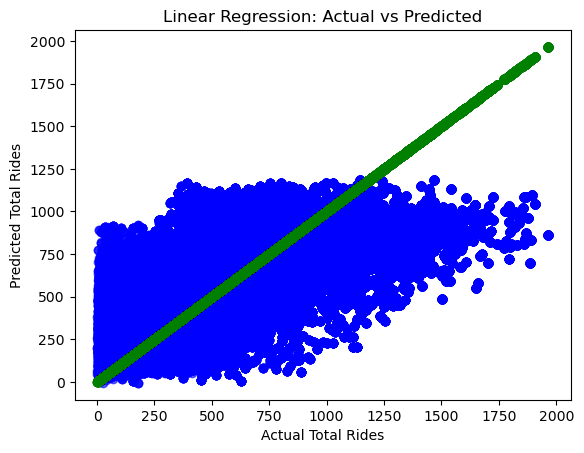

In [149]:
# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred,label='Predicted', alpha=0.6, color="blue")
plt.scatter(y_test, y_test, label='Actual', alpha=0.5, color='green')  # Actual values in green
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Total Rides')
plt.ylabel('Predicted Total Rides')
plt.show()


# Polynomial regression

In [174]:
from sklearn.pipeline import make_pipeline

y_train_transformed = np.log1p(y_train)
degree = 2

#  Polynomial Regression model
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Trains the model on the training set
model.fit(X_train_imputed, y_train_transformed)

# Makes predictions on the testing set
y_pred_transformed = model.predict(X_test_imputed)
y_predP=np.expm1(y_pred_transformed)

# # Evaluates the model

In [176]:

mse = mean_squared_error(y_test, y_predP)
r2 = r2_score(y_test, y_predP)

print(f'Mean Squared Error (Polynomial Regression): {mse}')
print(f'R-squared (Polynomial Regression): {r2}')

Mean Squared Error (Polynomial Regression): 75976.64524050524
R-squared (Polynomial Regression): 0.49603073560383615


In [184]:
mse = mean_squared_error(y_test, y_predP)
r2 = r2_score(y_test, y_predP)
mss = mse / len(y_test)  # Calculate Mean Squared Error per sample

print(f'Mean Squared Error (Polynomial Regression): {mse}')
print(f'R-squared (Polynomial Regression): {r2}')
print(f'Mean Squared Error per Sample (Polynomial Regression): {mss}')

Mean Squared Error (Polynomial Regression): 75976.64524050524
R-squared (Polynomial Regression): 0.49603073560383615
Mean Squared Error per Sample (Polynomial Regression): 0.2497588600937056


# Visualises the results from the ML

c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

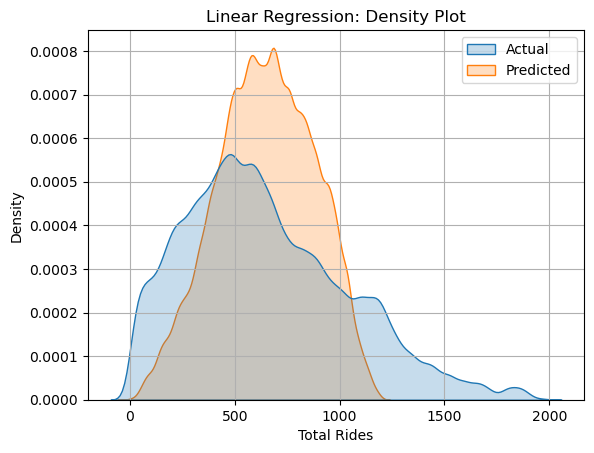

In [185]:
import seaborn as sns

linear_plot_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
linear_plot_=pd.DataFrame({'Actual': y_test, 'Predicted': y_predP})

# Plot density
sns.kdeplot(data=linear_plot_data, fill=True)
plt.title('Linear Regression: Density Plot')
plt.xlabel('Total Rides')
plt.grid(True)
plt.show()


c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

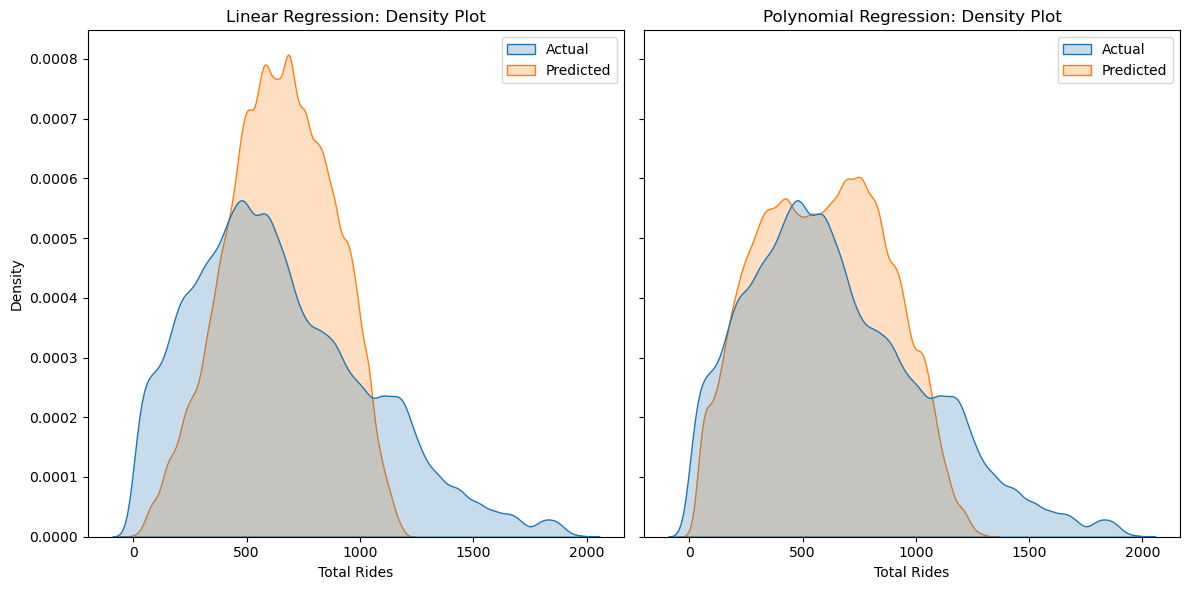

In [187]:

#  plotting
linear_plot_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
polynomial_plot_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_predP})

#  subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot Linear Regression Density Plot
sns.kdeplot(data=linear_plot_data, fill=True, ax=axes[0])
axes[0].set_title('Linear Regression: Density Plot')
axes[0].set_xlabel('Total Rides')

# Plot Polynomial Regression Density Plot
sns.kdeplot(data=polynomial_plot_data, fill=True, ax=axes[1])
axes[1].set_title('Polynomial Regression: Density Plot')
axes[1].set_xlabel('Total Rides')

plt.tight_layout()
plt.show()


The MSE for the Polynomial Regression model is 73138.24, which is lower than the MSE for the linear regression model (96429.06).
The lower MSE indicates that, on average, the Polynomial Regression model's predictions are closer to the actual values than the linear regression model.
The higher R-squared suggests that the Polynomial Regression model explains a larger proportion (approximately 51.49%) of the variance in the target variable compared to the linear regression model.

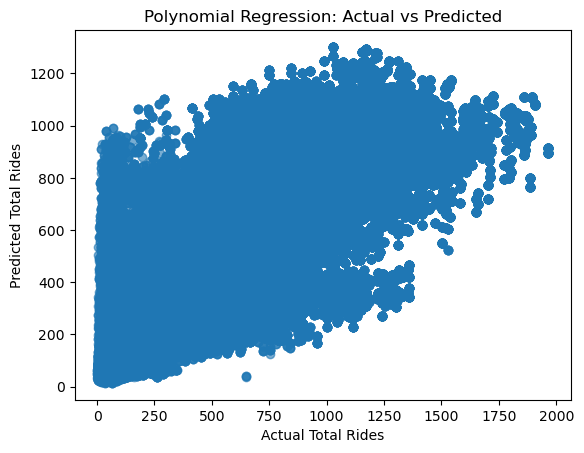

In [161]:
# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_predP, alpha=0.6)
plt.title('Polynomial Regression: Actual vs Predicted')
plt.xlabel('Actual Total Rides')
plt.ylabel('Predicted Total Rides')
plt.show()

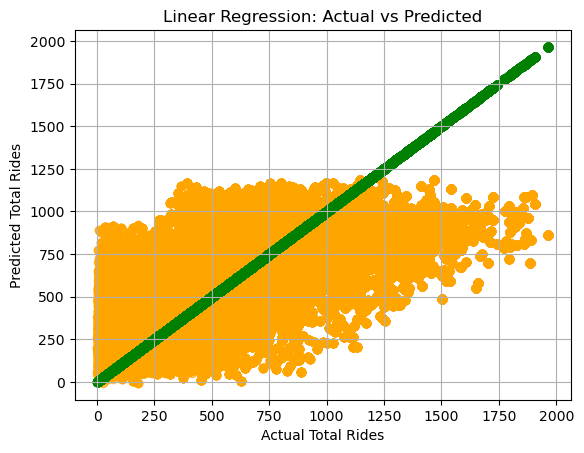

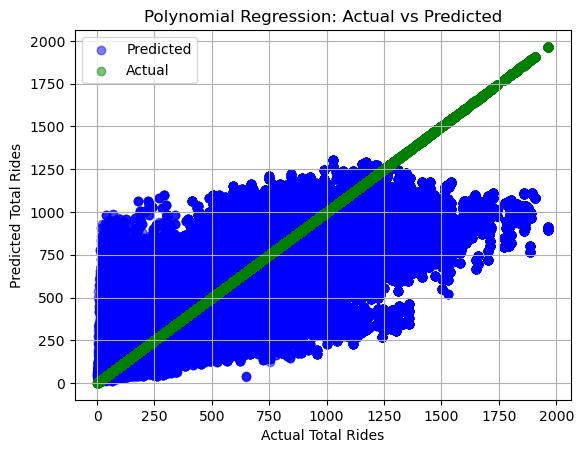

In [170]:
# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred,label='Predicted', alpha=0.6, color="orange")
plt.scatter(y_test, y_test, label='Actual', alpha=0.5, color='green')  # Actual values in green
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Total Rides')
plt.ylabel('Predicted Total Rides')
plt.grid(True)
plt.show()
plt.scatter(y_test, y_predP, label='Predicted', alpha=0.5, color='blue')
plt.scatter(y_test, y_test, label='Actual', alpha=0.5, color='green')  # Actual values in green
plt.title('Polynomial Regression: Actual vs Predicted')
plt.xlabel('Actual Total Rides')
plt.ylabel('Predicted Total Rides')
plt.grid(True)
plt.legend()
plt.show()

c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dariy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

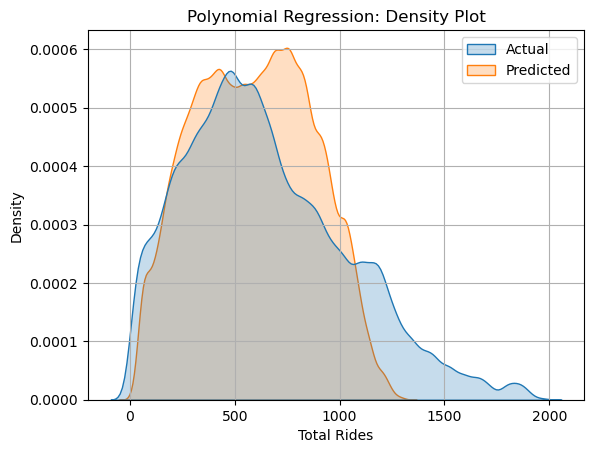

In [178]:
import seaborn as sns

# plotting
plot_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_predP})

# Plot density
sns.kdeplot(data=plot_data, fill=True)
plt.title('Polynomial Regression: Density Plot')
plt.xlabel('Total Rides')
plt.grid(True)
plt.show()


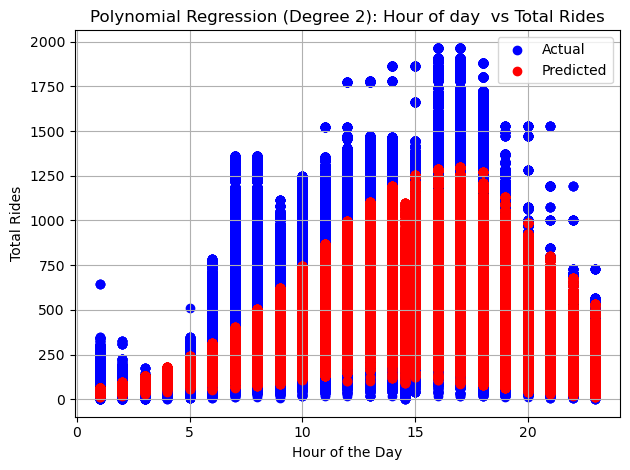

In [169]:

# actual values as scatter plot
plt.scatter(X_test_imputed[:, 3], y_test, color='blue', label='Actual')

# Predicted values as scatter plot
plt.scatter(X_test_imputed[:, 3], y_predP, color='red', label='Predicted')

plt.title('Polynomial Regression (Degree 2): Hour of day  vs Total Rides')
plt.xlabel("Hour of the Day")
plt.ylabel('Total Rides')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

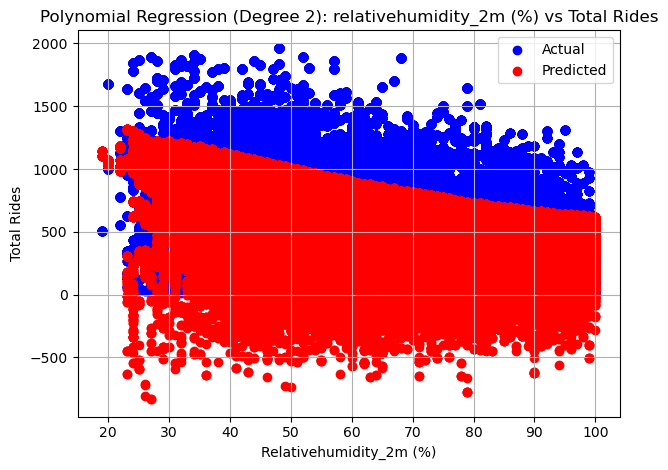

In [95]:

# actual values as scatter plot
plt.scatter(X_test['relativehumidity_2m (%)'], y_test, color='blue', label='Actual')

# Predicted values as scatter plot
plt.scatter(X_test['relativehumidity_2m (%)'], y_predP, color='red', label='Predicted')

plt.title('Polynomial Regression (Degree 2): relativehumidity_2m (%) vs Total Rides')
plt.xlabel('Relativehumidity_2m (%)')
plt.ylabel('Total Rides')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

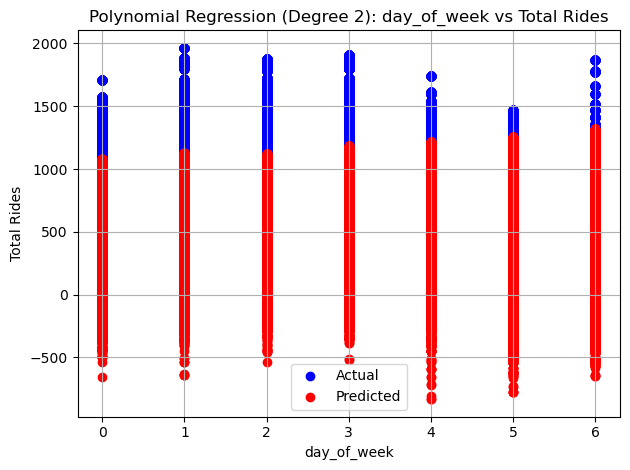

In [96]:

# ctual values as scatter plot
plt.scatter(X_test['day_of_week'], y_test, color='blue', label='Actual')

# Predicted values as scatter plot
plt.scatter(X_test['day_of_week'], y_predP, color='red', label='Predicted')

plt.title('Polynomial Regression (Degree 2): day_of_week vs Total Rides')
plt.xlabel('day_of_week')
plt.ylabel('Total Rides')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

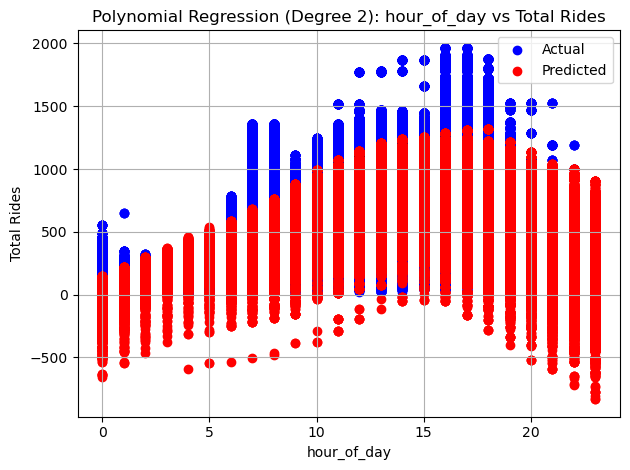

In [99]:
# ctual values as scatter plot
plt.scatter(X_test['hour_of_day'], y_test, color='blue', label='Actual')

# Predicted values as scatter plot
plt.scatter(X_test['hour_of_day'], y_predP, color='red', label='Predicted')

plt.title('Polynomial Regression (Degree 2): hour_of_day vs Total Rides')
plt.xlabel("hour_of_day")
plt.ylabel('Total Rides')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()